In [2]:
using LinearAlgebra, Plots

# Root Finding in a Single Variable

Given a function $f(x): \mathbb{R} \rightarrow \mathbb{R}$ find $x^*$ such that $f(x^*) = 0$.

Assumptions we make on f(.):

- Continuity

- Lipschitz continuity: A function $f$ is Lipschitz continuous if there exists a constant c such that $|f(x)-f(y)| \leq c|x-y|$. This limits the rate of change of the function.

- Differntiability

- $C^k$: A function is $C^k$ if it is $k$ times differentiable and each of those $k$ derivatives are continuous.

__Examples:__ $cos(x)$ is $C^{\infty}$ and Lipschitz on $\mathbb{R}$. $x^2$ is $C^{\infty}$ on $\mathbb{R}$ but not Lipschitz since its derivative is not limited and goes to $\infty$ in the limit. However it is Lipschitz in a specified interval such as $[0,1]$ since derivative is limited by $c=2$. $|x|$ is continuous and Lipschitz but not differentiable because the function is not smooth at $x=0$ and singular there. 

## Bisection

The simplest algorithm to find a root of a single variable function. Continuity of a function implies that if $f(a)<u<f(b)$ then there is a $a<z<b$ such that $f(z)=u$. Therefore given that $f(l) \cdot f(r) < 0$. There must be a value $x^*$ in the interval $(l,r)$ that satisfies $f(x^*) = 0$. 

In [8]:
function Bisection(f,l,r,eps1,eps2)
    cond = false
    x_star = NaN
    while cond == false
        c = (l+r)/2
        x_star = c
        if abs(f(c))<eps1 || abs(l-r)<eps2
            cond = true
        elseif f(l)*f(c) < 0
            r = c
        else
            l = c
        end
    end
    return x_star
end

Bisection (generic function with 1 method)

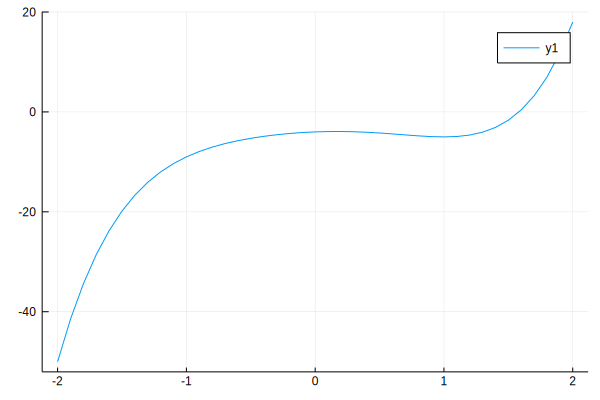

In [9]:
f(x) = x^5 - 3*x^2 + x - 4
x_vals = collect(-2:0.1:2)
f_vals = f.(x_vals)
plot(x_vals,f_vals)

In [12]:
Bisection(f,2,-2,0.01,0.01)

1.58203125

__Convergence analysis:__ Conditions (continuity, and $f(l_1) \cdot f(r_1)<0$) are satisfied, bisection algorithm converges in $k$ steps: $E_k \rightarrow 0$ for $E_k = |r_k - l_k|$. The rate of convergence is linear: $E_{k+1} = \frac{1}{2} E_k$. This is because the interval is diveded by two at each iteration. 

__Note:__ Finding $r_1$ and $l_1$ such that $x^* \in (r_1,l_1)$, in other words $f(l_1) \cdot f(r_1)<0$, is also a hard problem.

## Fixed Point Iteration

Suppose that we want to find $x^*$ such that $g(x^*) = x^*$. This is equivalent to finding the roots of $g(x^*) - x^*$. Assuming that $g(.)$ is Lipschitz continuous with constant $0 \leq c < 1$, $|g(x)-g(y)|<|x-y|$ and the following algorithm converges:

- Initilalize $x_0$

- Iterate $x_k \leftarrow g(x_{k-1})$

In [20]:
function FixedPointIteration(g,x_init,eps)
    x_old = x_init
    cond = false
    count = 1
    while cond == false
        x = g(x_old)
        error = abs(x-x_old)
        if error<eps
            cond = true
        else
            count += 1
        end
        x_old = x
        if count > 1000
            cond = true
        end
    end
    return x_old
end

FixedPointIteration (generic function with 1 method)

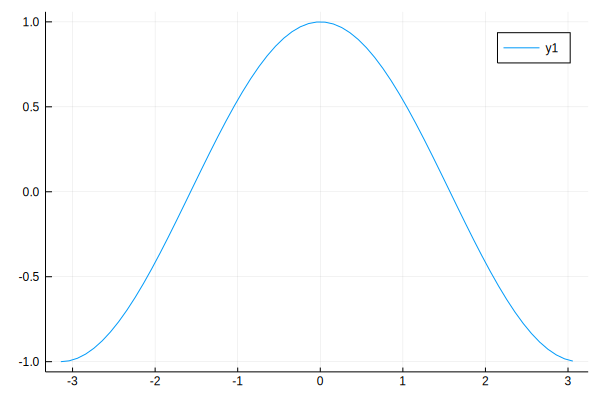

In [21]:
f(x) = cos(x)
x_vals = collect(-pi:0.1:pi)
f_vals = f.(x_vals)
plot(x_vals,f_vals)

In [22]:
FixedPointIteration(f,0,0.001)

0.7387603198742114

__Convergence analysis:__ $E_k = |x_k - x^*| = |g(x_{k-1}-g(x^*))|$

If $|g(x)-g(y)|<|x-y|$,

$|g(x_{k-1}-g(x^*))| \leq c |x_k - x^*| = c E_{k-1}$. Therefore $E_k \leq c^{k}E_0 \rightarrow 0$ as $k \rightarrow \infty$. Otherwise it diverges.

In [23]:
#Divergence example
f(x) = x^5 - 3*x^2 + x - 4
FixedPointIteration(f,0,0.001) #result after 1000 iterations

-8093997620220668896

In [24]:
f(-8093997620220668896)

-8615648534452713444

The algorithm converges if the $x_0$ is chosen in an interval where $g(.)$ is locally Lipschitz continuous with constant $0 \leq c < 1$ although it is not globally the case.

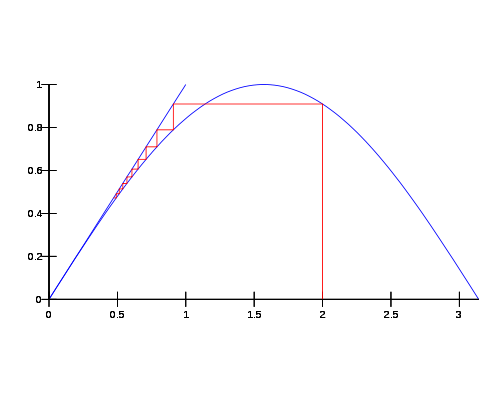

In [35]:
#Fixed point iteration for sin(.) with x_0 = 2
# Image is taken from Wikipedia
display("image/png", read("fixedpoint.png"))

In [29]:
f(x) = sin(x)
FixedPointIteration(f,2,0.01)

0.3803757974172909

In [30]:
f(x) = sin(x)
FixedPointIteration(f,2,0.001)

0.17995254959145557

In [31]:
f(x) = sin(x)
FixedPointIteration(f,2,0.0001)

0.08415996781732862

In [33]:
f(x) = sin(x)
FixedPointIteration(f,2,0.000001)

0.05460664743047168

In [34]:
sin(0)

0.0